In [1]:
from keras.datasets import mnist
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

Using TensorFlow backend.


In [2]:
import cv2
cv2.__version__

'3.4.3'

In [3]:
import sys
sys.version

'3.5.0 |Continuum Analytics, Inc.| (default, Dec  1 2015, 11:46:22) [MSC v.1900 64 bit (AMD64)]'

In [4]:
#prg3 顯示訓練資料的圖片與值
from keras.datasets import mnist

#讀取MNIST資料集
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

In [5]:
# 查看訓練資料
print(len(train_feature), len(train_label))   #60000 60000

60000 60000


In [6]:
# 查看維度
print(train_feature.shape, train_label.shape)   # (60000, 28, 28) (60000,)

(60000, 28, 28) (60000,)


In [7]:
# 顯示圖片與值
import matplotlib.pyplot as plt
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)  #數字圖片大小
    plt.imshow(image, cmap = 'binary')  #黑白灰階顯示
    plt.show()

show_image(train_feature[0])  #顯示訓練資料第1個數字

<Figure size 200x200 with 1 Axes>

In [8]:
print(train_label[0])    #顯示第1個訓練資料圖片真實值

5


In [9]:
# 顯示多張圖片與值（最多25張）
def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

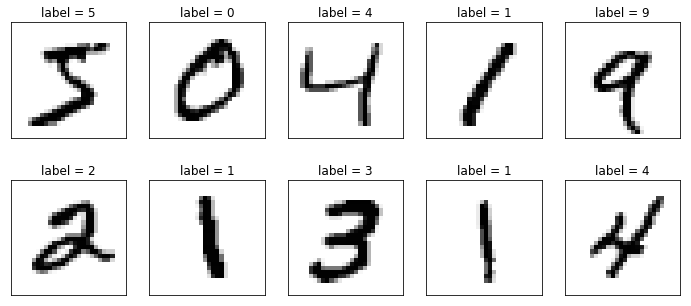

In [10]:
show_images_labels_predictions(train_feature, train_label, [], 0, 10)

In [11]:
# 以reshape()函數將28*28的數字圖片轉換成784個數字的一維向量，再以astype將每個數字都轉換為float數字
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')

#查看資料
print(train_feature_vector.shape, test_feature_vector.shape)

(60000, 784) (10000, 784)


In [12]:
# 顯示第1筆image資料內容。顯示0~255的浮點數。數字代表圖片中美一個點的灰階值
print(train_feature_vector[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [13]:
# Image標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#顯示第1筆的image正規化
print(train_feature_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [14]:
import numpy as np
from keras.utils import np_utils
np.random.seed(10)

train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

print(train_label_onehot[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [15]:
print(train_label[0:5])

[5 0 4 1 9]


In [16]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, input_dim=784, kernel_initializer='normal', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature_normalize, y=train_label_onehot,validation_split=0.2, epochs=50, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
 - 1s - loss: 0.4380 - accuracy: 0.8829 - val_loss: 0.2181 - val_accuracy: 0.9406
Epoch 2/50
 - 1s - loss: 0.1908 - accuracy: 0.9457 - val_loss: 0.1558 - val_accuracy: 0.9555
Epoch 3/50
 - 1s - loss: 0.1355 - accuracy: 0.9617 - val_loss: 0.1261 - val_accuracy: 0.9648
Epoch 4/50
 - 1s - loss: 0.1028 - accuracy: 0.9701 - val_loss: 0.1119 - val_accuracy: 0.9681
Epoch 5/50
 - 1s - loss: 0.0812 - accuracy: 0.9772 - val_loss: 0.0981 - val_accuracy: 0.9718
Epoch 6/50
 - 1s - loss: 0.0660 - accuracy: 0.9819 - val_loss: 0.0938 - val_accuracy: 0.9722
Epoch 7/50
 - 1s - loss: 0.0545 - accuracy: 0.9850 - val_loss: 0.0914 - val_accuracy: 0.9737
Epoch 8/50
 - 1s - loss: 0.0461 - accuracy: 0.9875 - val_loss: 0.0832 - val_accuracy: 0.9763
Epoch 9/50
 - 1s - loss: 0.0382 - accuracy: 0.9900 - val_loss: 0.0826 - val_accuracy: 0.9760
Epoch 10/50
 - 1s - loss: 0.0318 - accuracy: 0.9917 - val_loss: 0.0805 - val_accuracy: 0.9765
Epoch 11/50
 - 1s -

In [17]:
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=', scores[1])

10000/10000 [==============================] - 0s 15us/step

準確率= 0.9814000129699707


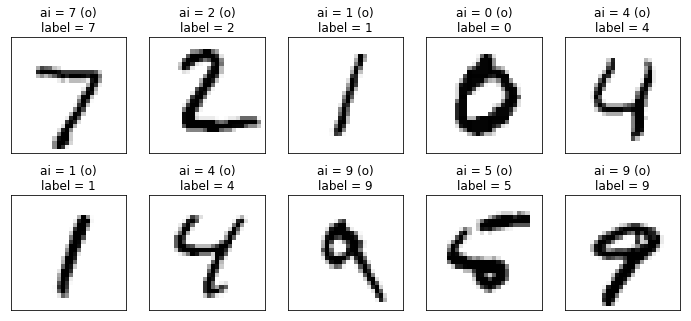

In [18]:
prediction=model.predict_classes(test_feature_normalize)
show_images_labels_predictions(test_feature,test_label,prediction,0)